In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('ticks')
warnings.filterwarnings("ignore")

<h1>Importing Data</h1>

The dataset contains two important .csv files: RAW_recipes.csv and RAW_interactions.csv. The following code will load both .csv files  into pandas dataframes for analysis.

In [2]:
raw_recipes = pd.read_csv('./RAW_recipes.csv')
raw_interactions = pd.read_csv('./RAW_interactions.csv')

<h2>RAW_recipes</h2>

I will first look at the raw_recipes dataframe. The following code will display some basic information about the data.

In [3]:
raw_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [4]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Each row in raw_recipes represents a different recipe and there are 231 thousand recipes total. There appear to be very few missing values in the dataset with the most common missing value being the description. The id column appears to be a unique identifier for each recipe which will prove useful later.

<h2>RAW_interactions</h2>

I will now look at the raw_interactions dataframe. The following code will display some basic information about the data.

In [5]:
raw_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [6]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


Each row in raw_interactions represents a unique review of a recipe. There can be multiple ratings for each recipe and there are over 1.1 million recipe ratings in total. Once again, there appear to be few missing values with all of them being in the review column. The recipe_id column seems to correspond with the id column in the raw_recipes dataset which will act as a common column to join the two dataframes on later.

<h1>Datetime Columns</h1>

I will begin by looking at the range of dates present in the dataset. The submitted column in raw_recipes shows when each recipe was submitted to the website and the date column in raw interactions shows when each review was posted. They are in string format so I will begin by converting them into datetime objects. This will make them easier to work with and visualize.

In [7]:
raw_recipes['submitted'] = pd.to_datetime( pd.Series(raw_recipes['submitted']))

raw_interactions['date'] = pd.to_datetime( pd.Series(raw_interactions['date']))

The following code will create plots to show the distribution of recipe submission and review dates.

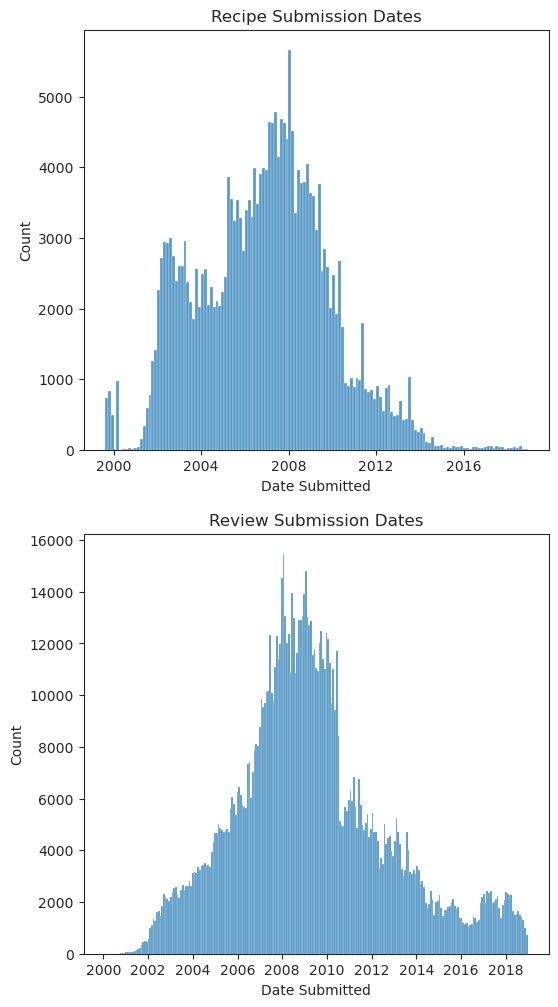

In [8]:
date_plot, date_ax = plt.subplots(2,1,figsize=(6,12))

sns.histplot(raw_recipes['submitted'],ax=date_ax[0])
date_ax[0].set_title('Recipe Submission Dates')
date_ax[0].set_xlabel('Date Submitted')


sns.histplot(raw_interactions['date'],ax=date_ax[1])
date_ax[1].set_title('Review Submission Dates')
date_ax[1].set_xlabel('Date Submitted');

Looking at the plots, it appears that most of the data was posted between the years 2000 and 2018 with the reviews being posted later than the recipes on average. This makes sense because the recipes need to be avialable to be reviewed. The plots also show a sharp decrease in activity, both in recipe submissions and reviews, around 2011.

<h1>Recipe and Review Posts per User</h1>

Next, I will look at how users as a whole interacted with the website. I will group contributions for both recipe submissions and reviews by user id to see how many times each user posted.

In [9]:
contrib_per_user = raw_recipes.groupby(['contributor_id'])['id'].count()
contrib_per_user.describe()

count    27926.000000
mean         8.294672
std         49.108016
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3118.000000
Name: id, dtype: float64

In [10]:
rating_per_user = raw_interactions.groupby(['user_id'])['recipe_id'].count()
rating_per_user.describe()

count    226570.000000
mean          4.997868
std          49.663111
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        7671.000000
Name: recipe_id, dtype: float64

For both recipe submissions and reviews, the median number of interactions for each user was 1. This means that the median user only posted or reviewed one recipe. There do appear to be some users that posted hundereds or thousands of recipes or reviews, but they are rare. The following code will show visually the number of recipe contributions and reviews posted by users.

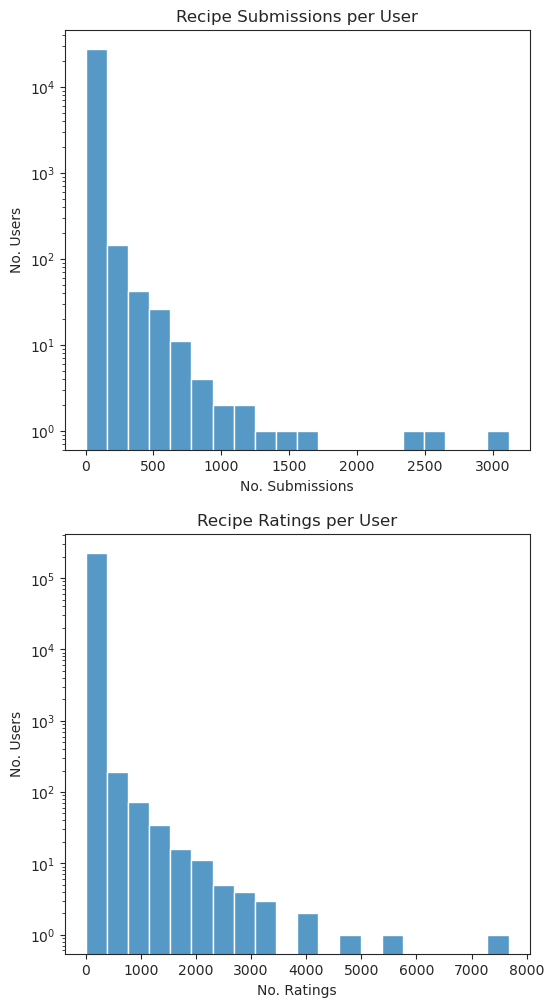

In [11]:
submission_count_plot, submission_count_ax = plt.subplots(2,1,figsize=(6,12))

sns.histplot(contrib_per_user,bins=20,ax=submission_count_ax[0])
submission_count_ax[0].set_yscale('log')
submission_count_ax[0].set_title('Recipe Submissions per User')
submission_count_ax[0].set_xlabel('No. Submissions')
submission_count_ax[0].set_ylabel('No. Users')

sns.histplot(rating_per_user,bins=20,ax=submission_count_ax[1])
submission_count_ax[1].set_yscale('log')
submission_count_ax[1].set_title('Recipe Ratings per User')
submission_count_ax[1].set_xlabel('No. Ratings')
submission_count_ax[1].set_ylabel('No. Users');

It is important to note that the y-axis scale on the above plots is logarithmic. It is very clear that the vast majority of users posted very few recipes or reviews on the website with a few power users posting hundreds to thousands of reviews on their own.

<h1>Recipe Durations</h1>

I will now look at the distribution in the amount of time it takes to make each recipe. The following code converts the minutes column to hours and plots the number of hours each recipe takes to make.

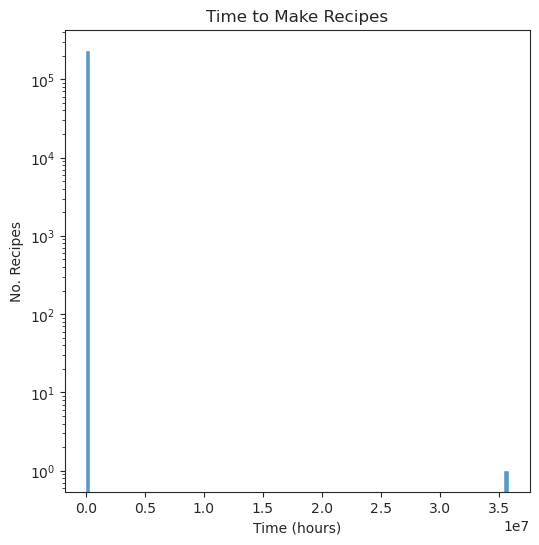

In [12]:
raw_recipes['hours'] = raw_recipes['minutes']/60

time_plot, time_ax = plt.subplots(figsize=(6,6))

sns.histplot(raw_recipes['hours'], ax=time_ax, bins=100)
time_ax.set_yscale('log')
time_ax.set_title('Time to Make Recipes')
time_ax.set_xlabel('Time (hours)')
time_ax.set_ylabel('No. Recipes');

It is important to note that the y-axis scale on the above plot is logarithmic. It is clear that there is some data entry error in this dataset because no recipe should take 3.5x10^7 hours to make. In order to make the times more reasonable, I will replace the time for any recipe that takes more than two days to make with a maximum time of two days. This should effect very few recipes.

In [13]:
median_time = raw_recipes['hours'].median()

print(f'The median recipe takes {median_time} hours to make.')

raw_recipes['hours_adjusted'] = raw_recipes['hours'].mask(raw_recipes['hours'] > 48, 48)

The median recipe takes 0.6666666666666666 hours to make.


The following code creates the same plot as above but with the maximum time of two days in place.

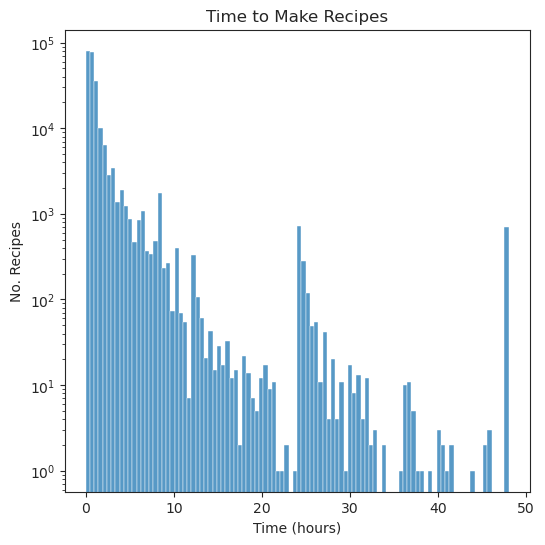

In [14]:
adjusted_time_plot, adjusted_time_ax = plt.subplots(figsize=(6,6))

sns.histplot(raw_recipes['hours_adjusted'], ax=adjusted_time_ax, bins=100)
adjusted_time_ax.set_yscale('log')
adjusted_time_ax.set_yscale('log')
adjusted_time_ax.set_title('Time to Make Recipes')
adjusted_time_ax.set_xlabel('Time (hours)')
adjusted_time_ax.set_ylabel('No. Recipes');

It is important to note that the y-axis scale on the above plot is logarithmic. Most recipes appear to only take a few hours to make with some taking over a day. There is a spike of recipes at the 24 hour mark compared to its surroundings suggesting that recipe authors could rounding the time it takes to make the recipes. There are less than one hundred recipes that take two days or more to make.

<h1>Recipe Steps</h1>

I will now look at the distribution in the number of steps in each recipe. The following code plots the number of steps in each recipe.

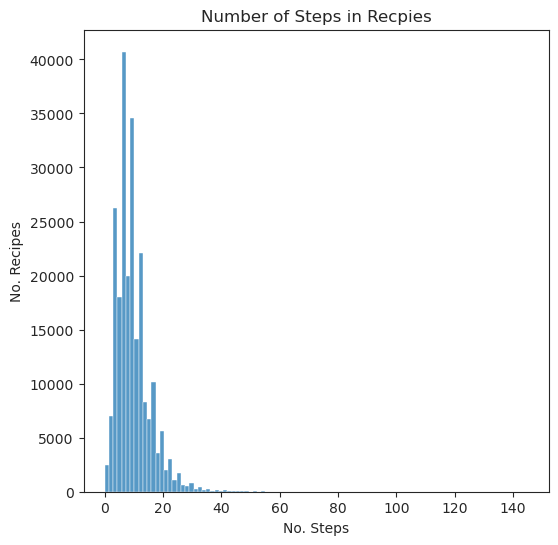

In [15]:
step_plot, step_ax = plt.subplots(figsize=(6,6))

sns.histplot(raw_recipes['n_steps'],bins=100, ax=step_ax)
step_ax.set_title('Number of Steps in Recpies')
step_ax.set_xlabel('No. Steps')
step_ax.set_ylabel('No. Recipes');

There is not much interesting here. Most recipes take between 1 and 20 steps to make with a couple outliers.

<h1>Recipe Ingredients</h1>

I will now look at the number of ingredients in each recipe. The following code plots the number of ingredients in each recipe.

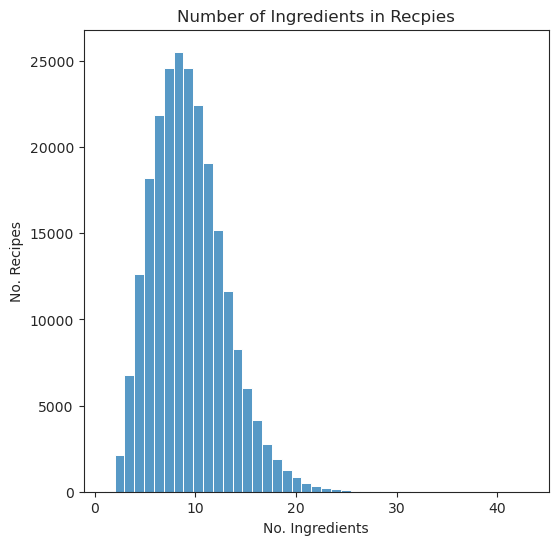

In [16]:
ingredient_plot, ingredient_ax = plt.subplots(figsize=(6,6))

sns.histplot(raw_recipes['n_ingredients'], ax=ingredient_ax, bins=43) #43 is the maximum number
                                                                      #of ingredients in any recipe
ingredient_ax.set_title('Number of Ingredients in Recpies')
ingredient_ax.set_xlabel('No. Ingredients')
ingredient_ax.set_ylabel('No. Recipes');

Once again, there is not much interesting here. Most recipes have between 1 and 20 ingredients with few outliers.

<h1>Recipe Steps Vs. Ingredients</h1>

Simple question: Do recipes with more ingredients typically take more steps to make? I will first check the correlation coefficient between steps and ingredients and then try to visualize their relationship using a plot.

In [17]:
print(f'''The correlation coefficience between the number of steps and the
number of ingredients is
{np.corrcoef(raw_recipes['n_steps'],raw_recipes['n_ingredients'])[1,0]}''')

The correlation coefficience between the number of steps and the
number of ingredients is
0.42770461257666637


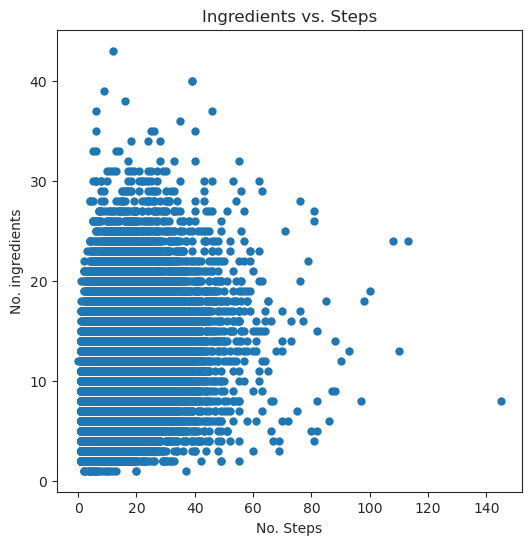

In [18]:
steps_vs_ingredients_plot, sve_ax = plt.subplots(figsize=(6,6))

sns.scatterplot(x=raw_recipes['n_steps'],y=raw_recipes['n_ingredients'],ax = sve_ax,linewidth=0)

sve_ax.set_title('Ingredients vs. Steps')
sve_ax.set_xlabel('No. Steps')
sve_ax.set_ylabel('No. ingredients');

There appears to be a weak to moderate positive correlation between the number of steps a recipe takes to make and the number of ingredients in the recipe. That is to say a recipe with more ingredients will generally take more steps to make.

<h1>Recipe Ratings</h1>

I will now look at the recipe ratings. I will start by looking at the typical rating given by users, not grouped by recipe.

In [19]:
print(f'''The average rating given was a {raw_interactions['rating'].mean()}''')
print(f'''The median rating given was a {raw_interactions['rating'].median()}''')

The average rating given was a 4.411016039852804
The median rating given was a 5.0


The typical rating seems to be very high. The median rating was a perfect 5 with the average rating not too far behind. The following code shows a plot of ratings provided by users, once again not grouped by recipe.

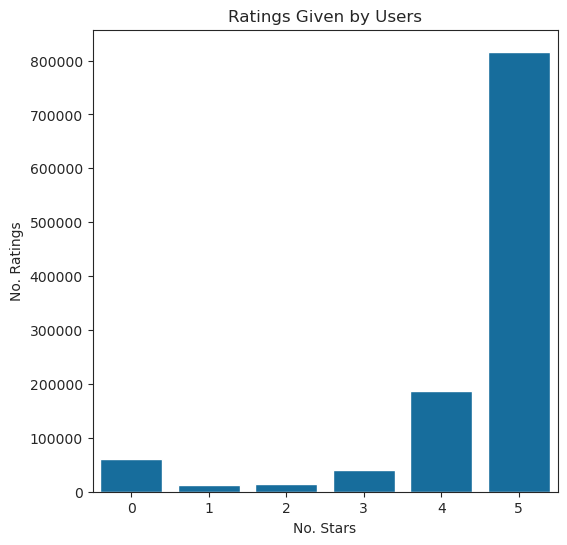

In [20]:
rating_plot, rating_ax = plt.subplots(figsize=(6,6))

sns.barplot(x=[0,1,2,3,4,5],y= raw_interactions.groupby('rating')['rating'].count(), ax=rating_ax, color='#0173b2')
rating_ax.set_title('Ratings Given by Users')
rating_ax.set_ylabel('No. Ratings')
rating_ax.set_xlabel('No. Stars');

Now, I will group the ratings by recipe to see how each recipe performed.

In [21]:
# .mean() gives each average recipe rating .mean() gives total average recipe rating
print(f'''The average recipe rating was a {raw_interactions.groupby('recipe_id')['rating'].mean().mean()}''')

# .mean() gives each average recipe rating .median() gives total median recipe rating
print(f'''The median recipe rating was a {raw_interactions.groupby('recipe_id')['rating'].mean().median()}''')

The average recipe rating was a 4.346246073856193
The median recipe rating was a 4.714285714285714


The typical rating grouped by recipe also seems very high. The median recipe scored a rating of 4.7 with the average recipe not too far behind. The following code shows a plot of the average rating for each recipe.

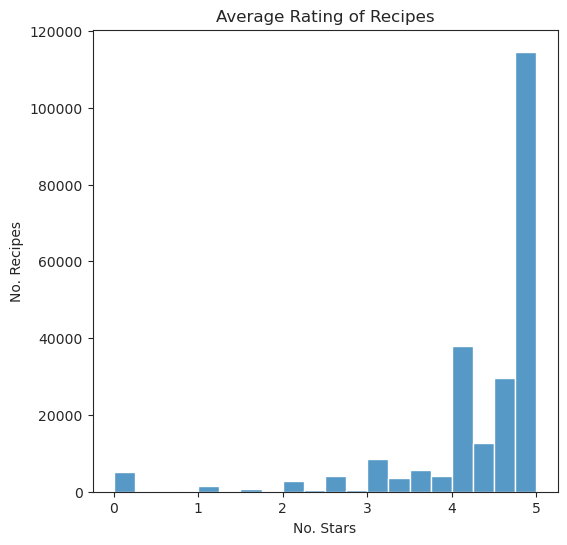

In [22]:
recipe_rating_plot, recipe_rating_ax = plt.subplots(figsize=(6,6))

sns.histplot(raw_interactions.groupby('recipe_id')['rating'].mean(),bins=20,ax=recipe_rating_ax)
recipe_rating_ax.set_title('Average Rating of Recipes')
recipe_rating_ax.set_ylabel('No. Recipes')
recipe_rating_ax.set_xlabel('No. Stars');

<h1>Recipe Nutrition</h1>

The raw_recipes dataframe contains nutrition information for each recipe. The information is condensed into once column and will need to be expanded so each nutritional value has its own column. The available nutritional information is the number of calories in each recipe as well as the percent daily value for total fat, sugar, sodium, protien, saturated fat, and carbs in rech recipe.

I will begin by creating a new dataframe with all of the nutrition information separated into their own columns.

In [23]:
nutrition_names = ['Calories', 'Total Fat', 'Sugar', 'Sodium', 'Protein', 'Saturated Fat', 'Carbs']

nutrition = pd.DataFrame(raw_recipes['nutrition'].str.replace('[','')\
    .str.replace(']','').str.replace(' ','').str.split(',',expand=True).astype(float))

nutrition.columns = nutrition_names

nutrition.describe()

,Calories,Total Fat,Sugar,Sodium,Protein,Saturated Fat,Carbs
count,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000
mean,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403
std,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560
min,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000
50%,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000
75%,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000
max,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000


<h1>Nutrition Calories</h1>
I will start by looking at the number of calories in each recipe. The following code creates a plot of the number of calories in each recipe.

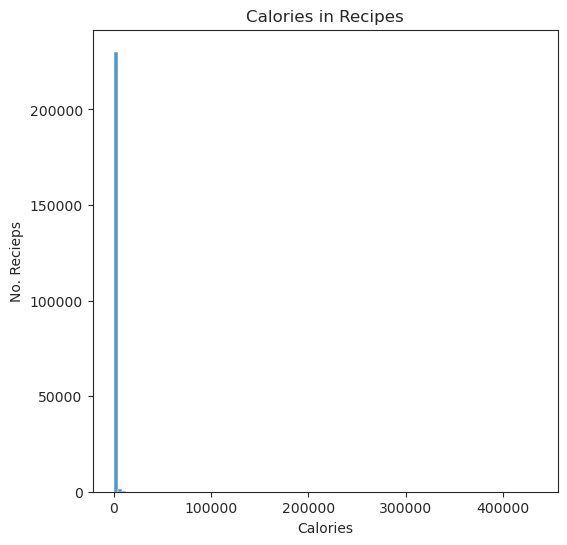

In [24]:
calorie_plot, calorie_ax = plt.subplots(figsize=(6,6))

sns.histplot(nutrition['Calories'],ax=calorie_ax,bins=100)

calorie_ax.set_xlabel('Calories')
calorie_ax.set_ylabel('No. Recieps')
calorie_ax.set_title('Calories in Recipes');

It looks like there are outliers that are difficult to visualize using a histogram. I will try a boxplot to see if I can get a better idea of what is going on.

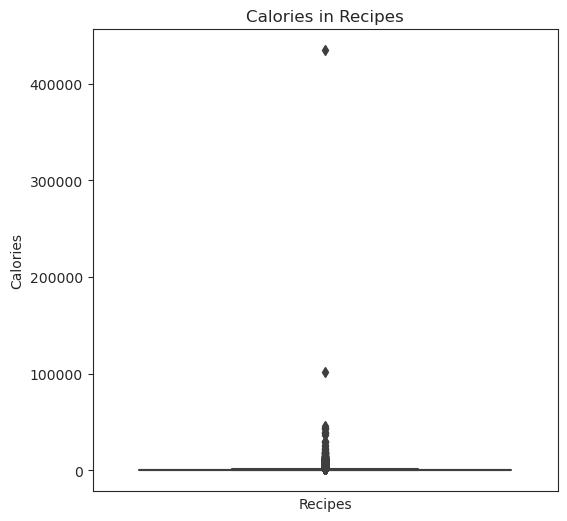

In [25]:
calorie_box, calorie_box_ax = plt.subplots(figsize=(6,6))

sns.boxplot(nutrition['Calories'], ax=calorie_box_ax)
calorie_box_ax.set_xticks([])
calorie_box_ax.set_xlabel('Recipes')
calorie_box_ax.set_ylabel('Calories')
calorie_box_ax.set_title('Calories in Recipes');

At least some of the outliers are definitely data entry errors because there is no recipe that has over four hundred thousand calories. Before I deal with this I will see if there is a similar situation present in the other nutrition types.

<h1>Nutrition Other Values</h1>
I will start by looking at the percent daily value of each nutrition type in each recipe. The following code creates a plot of percent daily value for each nutrition type.

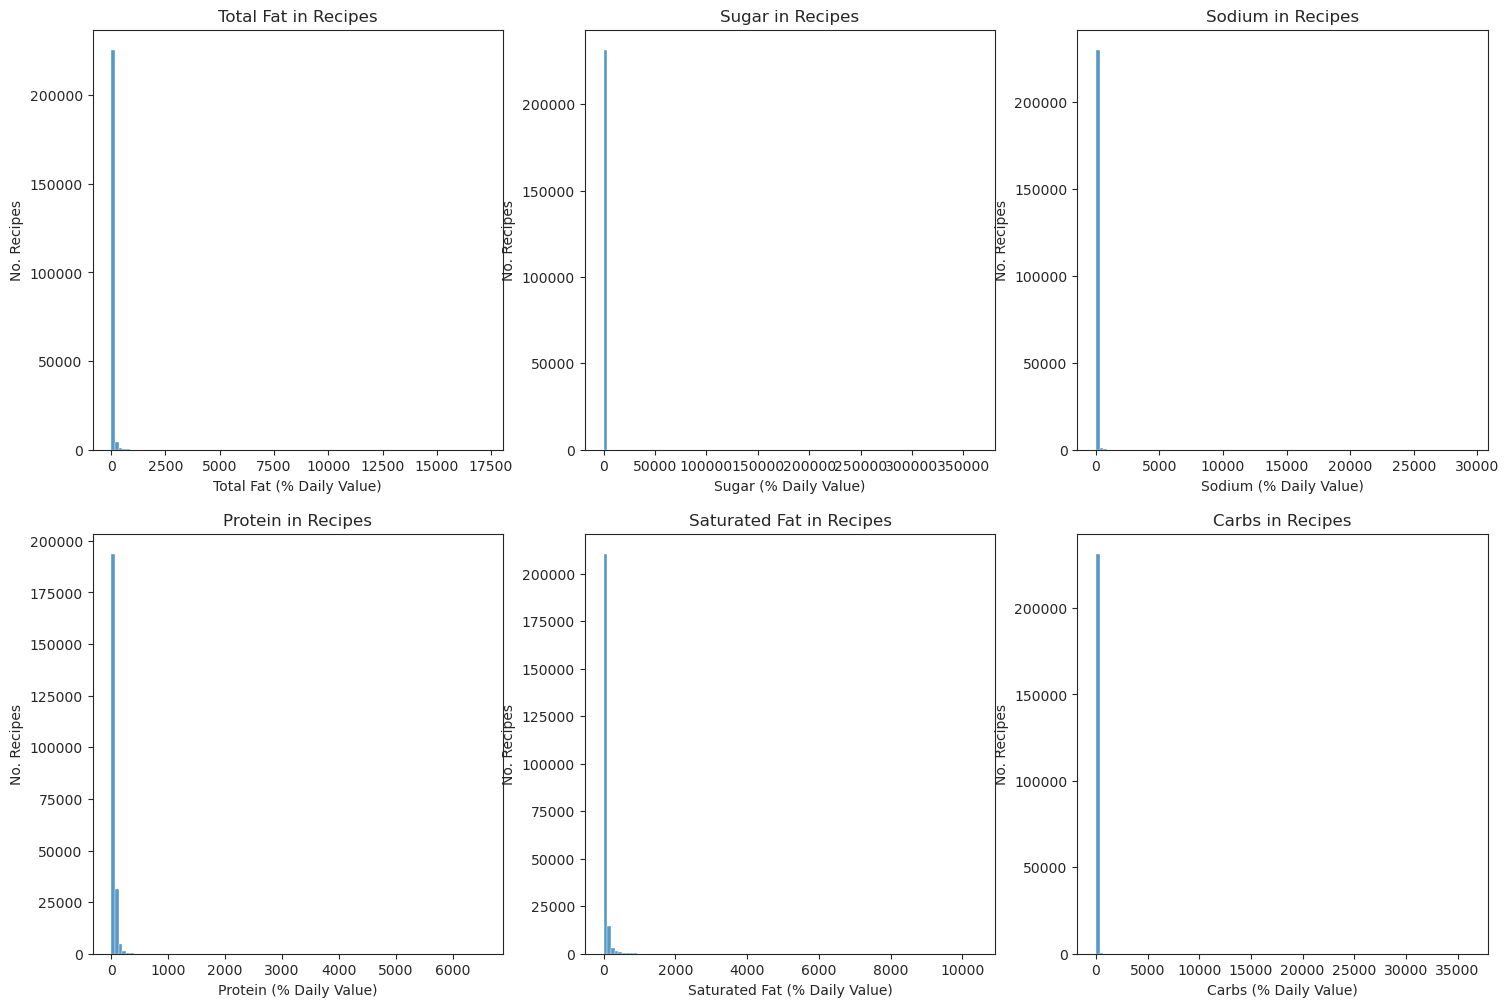

In [26]:
nutrition_plot, nutrition_ax = plt.subplots(2,3,figsize=(18,12))

for idx, nutrient in enumerate(nutrition_names[1:]): # Exclude Calories
    sns.histplot(nutrition[nutrient],ax=nutrition_ax[idx//3][idx%3],bins=100)
    nutrition_ax[idx//3][idx%3].set_title(f'{nutrient} in Recipes')
    nutrition_ax[idx//3][idx%3].set_ylabel('No. Recipes')
    nutrition_ax[idx//3][idx%3].set_xlabel(f'{nutrient} (% Daily Value)')

Once again, it looks like there are outliers that are difficult to visualize using a histogram. I will try a boxplot to see if I can get a better idea of what is going on for each nutrition type.

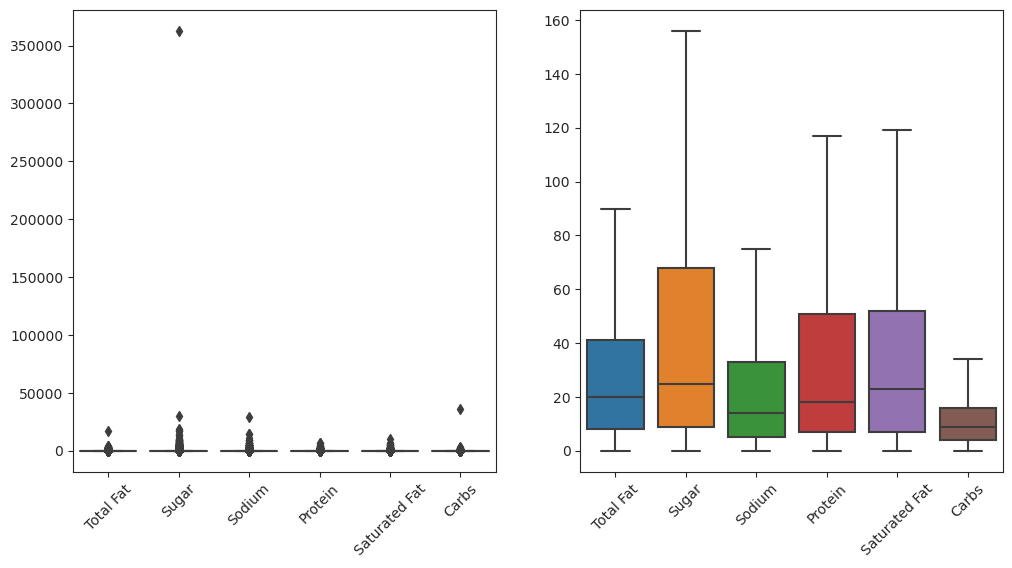

In [27]:
nutrition_box, nb_ax = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(nutrition[nutrition_names[1:]], ax=nb_ax[0])
sns.boxplot(nutrition[nutrition_names[1:]], ax=nb_ax[1], showfliers=False)
for ax in nb_ax:
    ax.tick_params(axis='x', rotation=45)

Once again, some of the outliers are definitely data entry errors. For example, there is no recipe that has three hundred fifty thousand percent daily value for sugar. I will now try to deal with the data entry errors in each of the nutrition types.

<h1>Nutrition Adjusting Values</h1>

In order to deal with the data entry errors, like with the time to make recipes, I will cap the values for each nutrition type at the 99th percentile for that nutrition type. This will allow there to be a different cap for each nutrition type which is appropriate for that type without me needing to choose a value with limited knowledge about nutrition. The following code creates a new dataframe called nutrition adjusted containing the capped nutrition values for each nutrition type.

In [28]:
nutrition_adjusted = pd.DataFrame()
for nutrient in nutrition_names:
    nutrition_adjusted[nutrient] = nutrition[nutrient].mask(
    nutrition[nutrient] > nutrition[nutrient].quantile(0.99),
    nutrition[nutrient].quantile(0.99))
    
nutrition_adjusted.describe()

,Calories,Total Fat,Sugar,Sodium,Protein,Saturated Fat,Carbs
count,231637.000000,231637.000000,231637.000000,231637.000000,231637.000000,231637.000000,231637.000000
mean,449.805182,33.913231,73.816842,25.979278,33.273000,42.341159,14.485324
std,519.412098,46.563242,159.880711,35.323228,37.159058,62.032417,22.251272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.400000,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000
50%,313.400000,20.000000,25.000000,14.000000,18.000000,23.000000,9.000000
75%,519.700000,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000
max,3516.956000,302.000000,1141.640000,219.000000,188.000000,404.000000,154.000000


The maximum values for each nutrition type look much more reasonable than in the unadjusted nutrition dataframe. Now I will repeat the visualizations I tried to make for the original nutrition dataframe.

<h1>Nutrition Adjusted Calories</h1>

I will start by looking at the number of calories in each recipe. The following code creates plots showing the number of calories in each recipe.

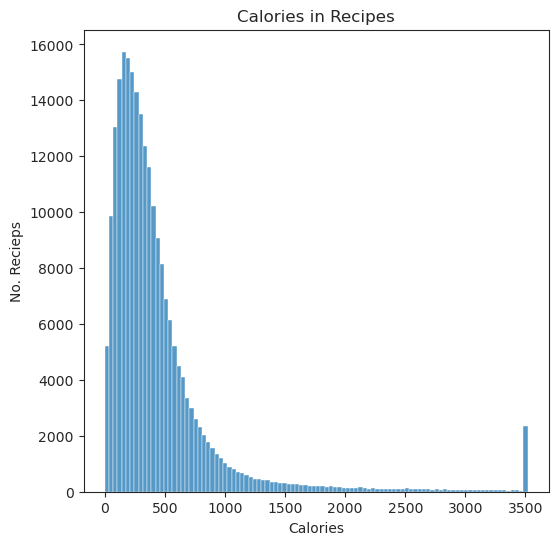

In [29]:
calorie_plot_adj, calorie_ax_adj = plt.subplots(figsize=(6,6))

sns.histplot(nutrition_adjusted['Calories'],ax=calorie_ax_adj,bins=100)

calorie_ax_adj.set_xlabel('Calories')
calorie_ax_adj.set_ylabel('No. Recieps')
calorie_ax_adj.set_title('Calories in Recipes');

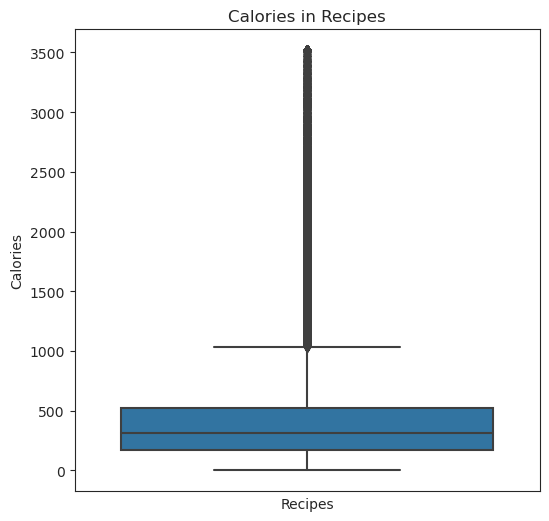

In [30]:
calorie_box_adjusted, calorie_box_ax_adjusted = plt.subplots(figsize=(6,6))

sns.boxplot(nutrition_adjusted['Calories'], ax=calorie_box_ax_adjusted)
calorie_box_ax_adjusted.set_xticks([])
calorie_box_ax_adjusted.set_xlabel('Recipes')
calorie_box_ax_adjusted.set_ylabel('Calories')
calorie_box_ax_adjusted.set_title('Calories in Recipes');

Once again, these values seem much more reasonable than the unadjusted values. Most recipes contain under a thousand calories, but there is a significant tail of recipes containing more. The median recipe appears to contain about 300 calories.

<h1>Nutrition Adjusted Other Values</h1>
Now I will look at the adjusted percent daily value of each nutrition type in each recipe. The following code creates plots of percent daily value for each nutrition type.

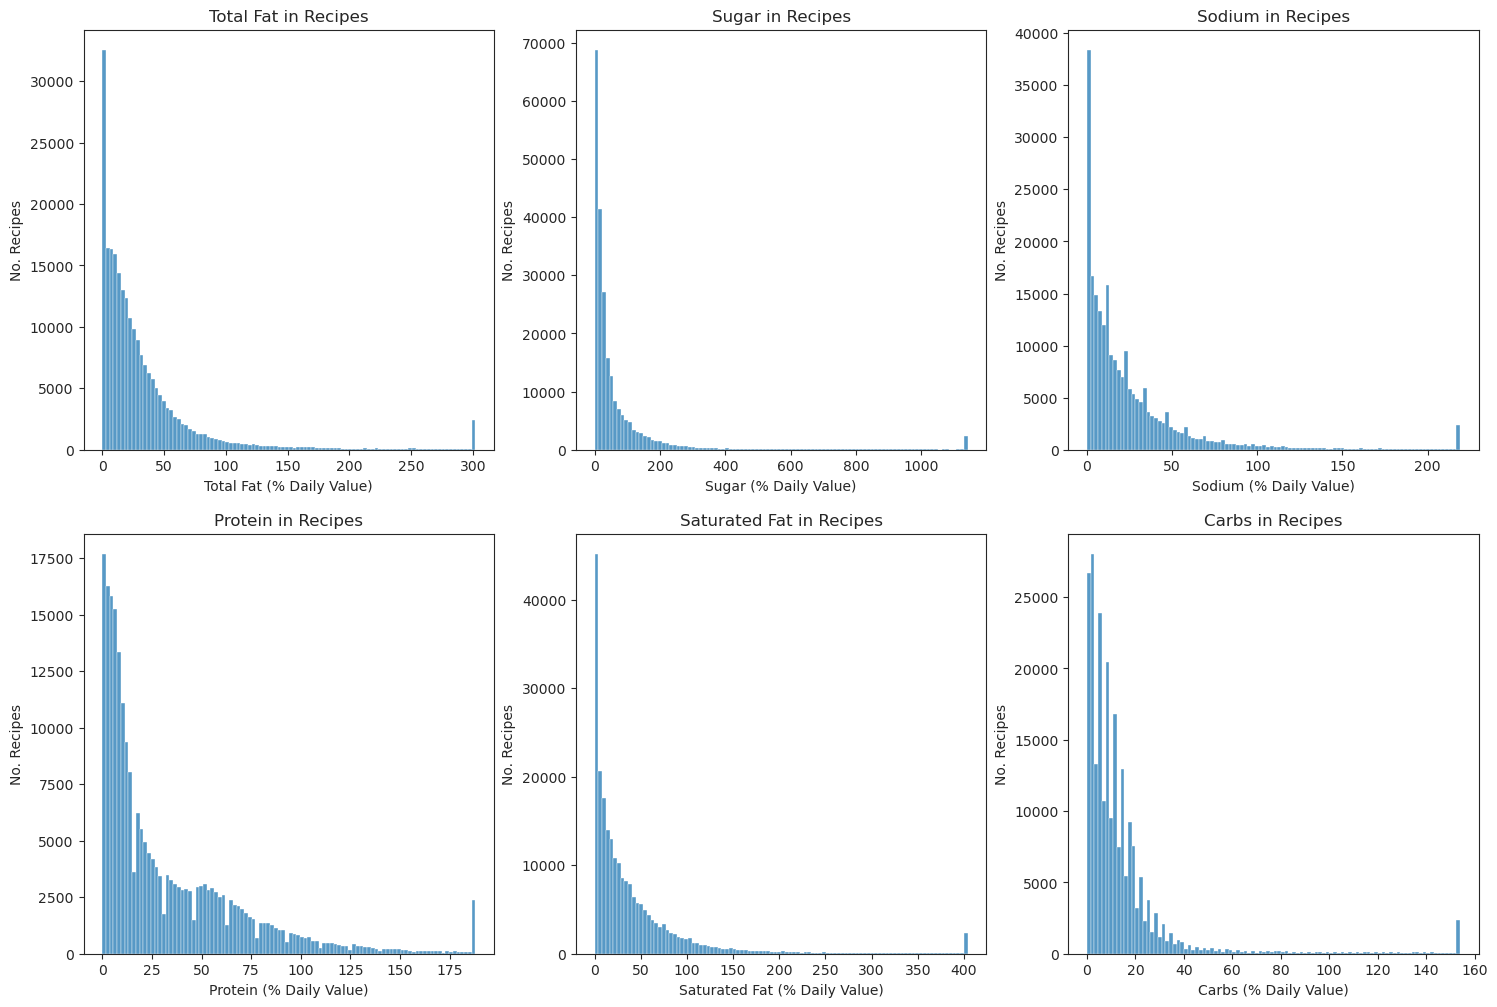

In [31]:
nutrition_plot_adjusted, nutrition_ax_adjusted = plt.subplots(2,3,figsize=(18,12))

for idx, nutrient in enumerate(nutrition_names[1:]): # Exclude Calories
    sns.histplot(nutrition_adjusted[nutrient],ax=nutrition_ax_adjusted[idx//3][idx%3],bins=100)
    nutrition_ax_adjusted[idx//3][idx%3].set_title(f'{nutrient} in Recipes')
    nutrition_ax_adjusted[idx//3][idx%3].set_ylabel('No. Recipes')
    nutrition_ax_adjusted[idx//3][idx%3].set_xlabel(f'{nutrient} (% Daily Value)')

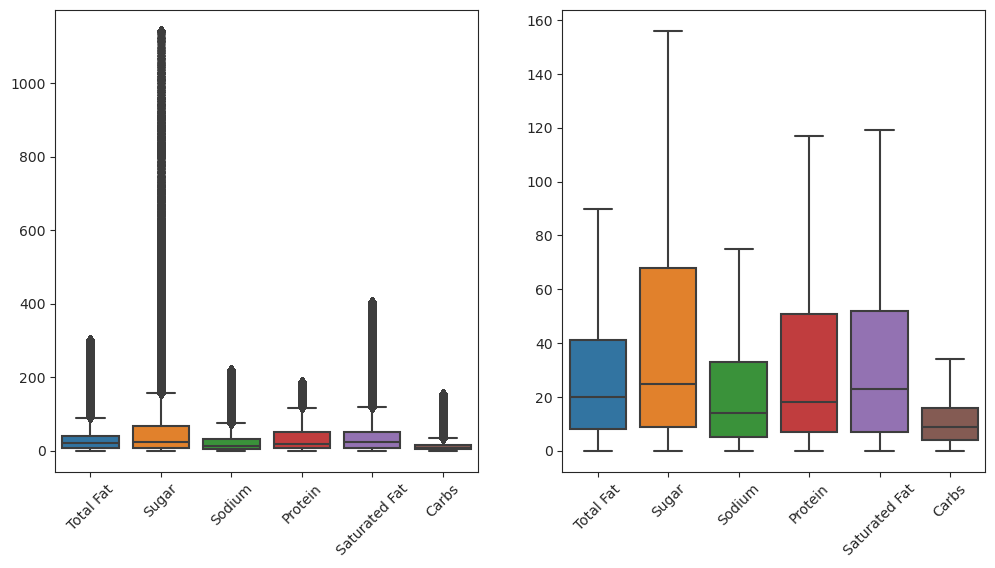

In [32]:
adjusted_nutrition_box, adjusted_nb_ax = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(nutrition_adjusted[nutrition_names[1:]], ax=adjusted_nb_ax[0])
sns.boxplot(nutrition_adjusted[nutrition_names[1:]], ax=adjusted_nb_ax[1], showfliers=False)
for ax in adjusted_nb_ax:
    ax.tick_params(axis='x', rotation=45)

Once again, these values seem much more reasonable than the unadjusted values. The highest percent daily values are in sugar with the median recipe containing over 20% of the recommended daily sugar value. Saturated fat is in second place for highest percent daily value and carbs comes in last. 

It is significant that most of these values are in percentage of the recommeneded daily value because they are not comparable in exact amounts. That is because the recommended daily value of each nutrition type will be different.

<h1>Nutrition Correlations</h1>

Now, I will see if there is any correlation between the amount of each nutrient in recipes.

,Calories,Total Fat,Sugar,Sodium,Protein,Saturated Fat,Carbs
Calories,1.000000,0.600259,0.864306,0.170535,0.486858,0.548207,0.904274
Total Fat,0.600259,1.000000,0.164644,0.155745,0.509336,0.870711,0.215954
Sugar,0.864306,0.164644,1.000000,0.084418,0.186464,0.166705,0.981260
Sodium,0.170535,0.155745,0.084418,1.000000,0.225052,0.144746,0.110883
Protein,0.486858,0.509336,0.186464,0.225052,1.000000,0.491322,0.238414
Saturated Fat,0.548207,0.870711,0.166705,0.144746,0.491322,1.000000,0.214146
Carbs,0.904274,0.215954,0.981260,0.110883,0.238414,0.214146,1.000000


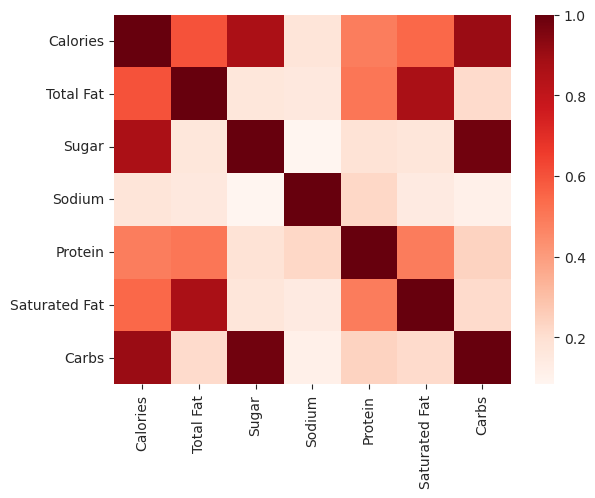

In [33]:
display(nutrition.corr())
sns.heatmap(nutrition.corr(),cmap='Reds',);

There are some significant correlations between the nutrients. For example, the amount of carbs and sugar are highly correlated which makes sense because sugars are carbs. Similary, saturated and total fats are highly correlated. There is also a good positive correlation between sugar/carbs and calories so recipes high in sugar and carbs are also likely to be high in calories. The positive correlation between total/saturated fats and calories is weaker than that of carbs/sugar but still significant meaning that recipes high in total/saturated fats are also likely to be high in calories.

<h1>Text Analysis

In [34]:
#stop = nltk.corpus.stopwords.words('english')

In [35]:
#names = recipes_with_nutrition['name'].fillna('blank').astype('str')
#name_tokens = nltk.word_tokenize(names.str.cat(sep=' '))
#filtered_name_tokens = [token for token in name_tokens if token not in stop]

In [36]:
#name_freq = nltk.FreqDist(filtered_name_tokens)

In [37]:
#name_freq.most_common(20)

In [38]:
#tokenizer = nltk.tokenize.RegexpTokenizer(r"'(.*?)'", gaps=True)

#ingredient = recipes_with_nutrition['ingredients'].fillna('blank').astype('str')
#ingredient_tokens = tokenizer.tokenize(text=ingredient.str.cat(sep=' '))
#filtered_ingredient_tokens = [token for token in ingredient_tokens if token not in stop]

In [39]:
#ingredient

In [40]:
#ingr_freq = nltk.FreqDist(filtered_ingredient_tokens)

In [41]:
#ingr_freq.most_common(20)